In [1]:
import numpy as np                     # Llibreria matematica
import matplotlib.pyplot as plt        # Per mostrar plots
import sklearn                         # Llibreia de DM
import sklearn.datasets as ds            # Per carregar mes facilment el dataset digits
import sklearn.model_selection as cv    # Pel Cross-validation
import sklearn.neighbors as nb           # Per fer servir el knn
from sklearn.model_selection import cross_val_score  
import sklearn.preprocessing as Pre
import warnings
warnings.filterwarnings('ignore')       #Per fer que els warnings no apareguin
%matplotlib inline              

In [2]:
import numpy as np    # Numeric and matrix computation
import pandas as pd   # Optional: good package for manipulating data 
import sklearn as sk  # Package with learning algorithms implemented

# Loading the dataset.
df = pd.read_csv('train.csv', sep=',', na_values="NA")

In [3]:
df.head()

,MSSubClass,MSZoning,LotArea,LotShape,LandContour,LotConfig,Neighborhood,Condition1,BldgType,HouseStyle,...,MiscVal,SaleType,SaleCondition,SalePrice,MasVnr,SecondFloor,Baths,Porch,Pool,Id
0,G,RH,0.185945,1.0,Lvl,Inside,Edwards,Artery,1Fam,2Story,...,0.0,WD,Normal,Level2,0.0,1.0,0.4,True,0.0,0
1,A,RL,0.198890,1.0,Lvl,Inside,NAmes,Norm,1Fam,1Story,...,0.0,WD,Family,Level2,1.0,0.0,0.0,True,0.0,1
2,L,RL,0.260616,1.0,Lvl,Corner,NridgHt,Norm,Twnhs,1Story,...,0.0,New,Partial,Level4,1.0,0.0,0.4,True,0.0,2
3,A,RL,0.251230,1.0,Lvl,Inside,NAmes,Norm,1Fam,1Story,...,0.0,WD,Abnorml,Level1,1.0,0.0,0.0,False,0.0,3
4,E,RL,0.174186,1.0,Lvl,Inside,SWISU,Norm,1Fam,1.5Fin,...,0.0,WD,Normal,Level2,0.0,1.0,0.4,True,0.0,4


In [4]:
X = df.drop(columns='SalePrice')
X = X.drop(columns = 'Id')
Y = df.loc[:,'SalePrice']

le = Pre.LabelEncoder()
le.fit(Y)
Y = le.fit_transform(Y)
i = 0
for t in X.dtypes:
    if t == object or t == bool:
        le.fit(X.iloc[:,i])
        X.iloc[:,i] = le.fit_transform(X.iloc[:,i])
    i += 1

X_train, X_test, y_train, y_test = cv.train_test_split(X, Y, test_size=.3, random_state=1)

In [5]:
df.describe()

,LotArea,LotShape,OverallQual,YearBuilt,ExterQual,TotalBsmtSF,HeatingQC,CentralAir,GrLivArea,BedroomAbvGr,...,TotRmsAbvGrd,Fireplaces,GarageArea,Fence,MiscVal,MasVnr,SecondFloor,Baths,Pool,Id
count,1006.000000,1006.000000,1006.000000,1006.000000,1006.000000,1006.000000,1006.000000,1006.000000,1006.000000,1006.000000,...,1006.000000,1006.000000,1006.000000,1006.000000,1006.000000,1006.000000,1006.000000,1006.000000,1006.000000,1006.000000
mean,0.293021,0.637177,0.570245,0.728888,0.469516,0.329981,0.792247,0.937376,0.283904,0.358847,...,0.375911,0.200795,0.338268,0.189861,0.003379,0.429423,0.434394,0.287475,0.003976,502.500000
std,0.136720,0.481054,0.148758,0.215303,0.191900,0.127514,0.237010,0.242406,0.119330,0.102457,...,0.134484,0.211069,0.148924,0.392386,0.038159,0.495240,0.495924,0.179280,0.062962,290.551487
min,0.000000,0.000000,0.000000,0.021739,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.217776,0.000000,0.444444,0.601449,0.333333,0.248051,0.500000,1.000000,0.193264,0.250000,...,0.250000,0.000000,0.241727,0.000000,0.000000,0.000000,0.000000,0.200000,0.000000,251.250000
50%,0.287275,1.000000,0.555556,0.746377,0.333333,0.309420,1.000000,1.000000,0.273298,0.375000,...,0.333333,0.333333,0.344964,0.000000,0.000000,0.000000,0.000000,0.200000,0.000000,502.500000
75%,0.358753,1.000000,0.666667,0.934783,0.666667,0.407205,1.000000,1.000000,0.348141,0.375000,...,0.416667,0.333333,0.414388,0.000000,0.000000,1.000000,1.000000,0.400000,0.000000,753.750000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.762675,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1005.000000


## Linear SVM

In [6]:
from sklearn.svm import SVC
from sklearn.svm import LinearSVC
from sklearn.model_selection import GridSearchCV

#knc = LinearSVC() 
knc = SVC(kernel='linear')
knc.fit(X_train, y_train)
pred=knc.predict(X_test)
print("Confusion matrix on test set:\n",sklearn.metrics.confusion_matrix(y_test, pred))
print("\nf1 on test set: ",sklearn.metrics.f1_score(y_test, pred,average='macro'))

Confusion matrix on test set:
 [[ 13  10   0   0   0]
 [  3 183  14   0   0]
 [  0  11  49   2   0]
 [  0   0   5   6   1]
 [  0   0   1   2   2]]

f1 on test set:  0.6732306818468107


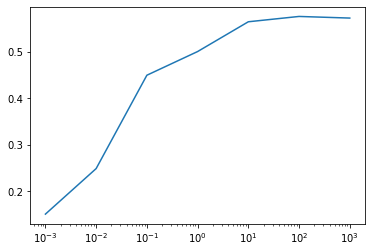

f1 10-fold cross on train data=  0.5754518148556477

Confusion matrix on test set:
 [[ 18   5   0   0   0]
 [  7 183  10   0   0]
 [  1   8  46   7   0]
 [  0   0   4   7   1]
 [  0   0   1   2   2]]

f1 on test set:  0.6813807562936482

Best value of parameter C found:  {'C': 100.0}

Number of supports:  288 ( 110 of them have slacks)
Prop. of supports:  0.4090909090909091


In [13]:
# List of C values to test. We usualy test diverse orders of magnitude
#Cs = np.logspace(-3, 11, num=15, base=10.0)
Cs = np.logspace(-3, 3, num=7, base=10.0)

param_grid = {'C': Cs}
#grid_search = GridSearchCV(LinearSVC(), param_grid, cv=10)
grid_search = GridSearchCV(SVC(kernel='linear'), param_grid, cv=10,scoring='f1_macro')
grid_search.fit(X_train,y_train)

# Let's plot the 10-fold cross.validation accuracy deppending on C
scores = grid_search.cv_results_['mean_test_score']
plt.semilogx(Cs,scores)
plt.show()

parval=grid_search.best_params_
cvacc = cross_val_score(SVC(C=parval['C'],kernel='linear'), X=X_train,  y=y_train, cv=10, scoring='f1_macro')
print('f1 10-fold cross on train data= ', cvacc.mean())


# Let's apply the best C parameter found to the test set

#knc = LinearSVC(C=parval['C']) 
knc = SVC(C=parval['C'],kernel='linear')
knc.fit(X_train, y_train)
pred=knc.predict(X_test)
print("\nConfusion matrix on test set:\n",sklearn.metrics.confusion_matrix(y_test, pred))
print("\nf1 on test set: ",sklearn.metrics.f1_score(y_test, pred,average='macro'))
print("\nBest value of parameter C found: ",parval)
print("\nNumber of supports: ",np.sum(knc.n_support_), "(",np.sum(np.abs(knc.dual_coef_)==parval['C']) ,"of them have slacks)")
print("Prop. of supports: ",np.sum(knc.n_support_)/X_train.shape[0])

## Polynomial kernels

In [14]:
knc = SVC(kernel='poly',degree =2) 
knc.fit(X_train, y_train)
pred=knc.predict(X_test)
print("Confusion matrix on test set:\n",sklearn.metrics.confusion_matrix(y_test, pred))
print("\nf1 on test set: ",sklearn.metrics.f1_score(y_test, pred,average='macro'))

Confusion matrix on test set:
 [[ 12  11   0   0   0]
 [  8 178  14   0   0]
 [  1  20  40   1   0]
 [  0   0   4   7   1]
 [  0   0   1   3   1]]

f1 on test set:  0.5942874312115786


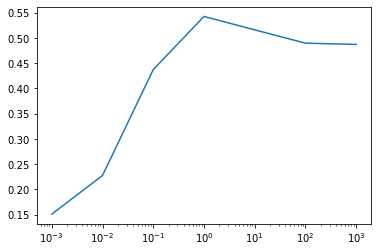

f1 10-fold cross on train data=  0.5417348705169939

Confusion matrix on test set:
 [[ 12  11   0   0   0]
 [  8 178  14   0   0]
 [  1  20  40   1   0]
 [  0   0   4   7   1]
 [  0   0   1   3   1]]

nf1 on test set:  0.5942874312115786

Best combination of parameters found:  {'C': 1.0}

Number of supports:  418 ( 242 of them have slacks)
Prop. of supports:  0.59375


In [15]:
Cs = np.logspace(-3, 3, num=7, base=10.0)

param_grid = {'C': Cs}
grid_search = GridSearchCV(SVC(kernel='poly',degree =2) , param_grid, cv=10,scoring='f1_macro')
grid_search.fit(X_train,y_train)

scores = grid_search.cv_results_['mean_test_score']

plt.semilogx(Cs,scores)
plt.show()

parval=grid_search.best_params_

cvacc = cross_val_score(SVC(kernel='poly',degree =2,C=parval['C']) , X=X_train,  y=y_train, cv=10, scoring='f1_macro')
print('f1 10-fold cross on train data= ', cvacc.mean())


knc = SVC(kernel='poly',degree =2,C=parval['C']) 
knc.fit(X_train, y_train)
pred=knc.predict(X_test)
print("\nConfusion matrix on test set:\n",sklearn.metrics.confusion_matrix(y_test, pred))
print("\nnf1 on test set: ",sklearn.metrics.f1_score(y_test, pred,average='macro'))
print("\nBest combination of parameters found: ",parval)
print("\nNumber of supports: ",np.sum(knc.n_support_), "(",np.sum(np.abs(knc.dual_coef_)==parval['C']) ,"of them have slacks)")
print("Prop. of supports: ",np.sum(knc.n_support_)/X_train.shape[0])

In [16]:
knc = SVC(kernel='poly',degree =3) 
knc.fit(X_train, y_train)
pred=knc.predict(X_test)
print("Confusion matrix on test set:\n",sklearn.metrics.confusion_matrix(y_test, pred))
print("\nf1 on test set: ",sklearn.metrics.f1_score(y_test, pred,average='macro'))

Confusion matrix on test set:
 [[ 14   9   0   0   0]
 [ 14 169  16   1   0]
 [  1  16  41   4   0]
 [  0   2   4   5   1]
 [  0   0   1   3   1]]

f1 on test set:  0.5478003000583646


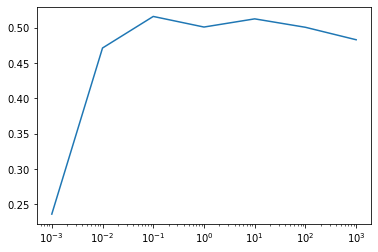

f1 10-fold cross on train data=  0.5152085921327926

Confusion matrix on test set:
 [[ 12  11   0   0   0]
 [ 13 173  14   0   0]
 [  1  20  40   1   0]
 [  0   0   5   6   1]
 [  0   0   1   3   1]]

Best combination of parameters found:  {'C': 0.1}

f1 on test set:  0.5666276196037134

Number of supports:  409 ( 150 of them have slacks)
Prop. of supports:  0.5809659090909091


In [17]:
Cs = np.logspace(-3, 3, num=7, base=10.0)

param_grid = {'C': Cs}
grid_search = GridSearchCV(SVC(kernel='poly',degree =3) , param_grid, cv=10,scoring='f1_macro')
grid_search.fit(X_train,y_train)

scores = grid_search.cv_results_['mean_test_score']

plt.semilogx(Cs,scores)
plt.show()

parval=grid_search.best_params_

cvacc = cross_val_score(SVC(kernel='poly',degree =3,C=parval['C']) , X=X_train,  y=y_train, cv=10, scoring='f1_macro')
print('f1 10-fold cross on train data= ', cvacc.mean())

knc = SVC(kernel='poly',degree =3,C=parval['C']) 
knc.fit(X_train, y_train)
pred=knc.predict(X_test)
print("\nConfusion matrix on test set:\n",sklearn.metrics.confusion_matrix(y_test, pred))
print("\nBest combination of parameters found: ",parval)
print("\nf1 on test set: ",sklearn.metrics.f1_score(y_test, pred,average='macro'))
print("\nNumber of supports: ",np.sum(knc.n_support_), "(",np.sum(np.abs(knc.dual_coef_)==parval['C']) ,"of them have slacks)")
print("Prop. of supports: ",np.sum(knc.n_support_)/X_train.shape[0])

In [18]:
knc = SVC(kernel='poly',degree =4) 
knc.fit(X_train, y_train)
pred=knc.predict(X_test)
print("Confusion matrix on test set:\n",sklearn.metrics.confusion_matrix(y_test, pred))
print("\nf1 on test set: ",sklearn.metrics.f1_score(y_test, pred,average='macro'))

Confusion matrix on test set:
 [[ 14   9   0   0   0]
 [ 11 173  15   1   0]
 [  0  17  42   3   0]
 [  0   2   4   5   1]
 [  0   0   1   3   1]]

f1 on test set:  0.5651953066642149


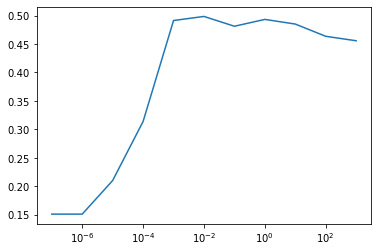

f1 10-fold cross on train data=  0.47115926723539225

Confusion matrix on test set:
 [[ 13  10   0   0   0]
 [ 12 170  17   1   0]
 [  1  22  37   2   0]
 [  0   0   5   6   1]
 [  0   0   1   3   1]]

Best combination of parameters found:  {'C': 0.01}

f1 on test set:  0.5537310103880064

Number of supports:  399 ( 99 of them have slacks)
Prop. of supports:  0.5667613636363636


In [19]:
Cs = np.logspace(-7, 3, num=11, base=10.0)

param_grid = {'C': Cs}
grid_search = GridSearchCV(SVC(kernel='poly',degree =4) , param_grid, cv=10,scoring='f1_macro')
grid_search.fit(X_train,y_train)

scores = grid_search.cv_results_['mean_test_score']

plt.semilogx(Cs,scores)
plt.show()

parval=grid_search.best_params_

cvacc = cross_val_score(SVC(kernel='poly',degree =3,C=parval['C']) , X=X_train,  y=y_train, cv=10, scoring='f1_macro')
print('f1 10-fold cross on train data= ', cvacc.mean())

knc = SVC(kernel='poly',degree =4,C=parval['C']) 
knc.fit(X_train, y_train)
pred=knc.predict(X_test)
print("\nConfusion matrix on test set:\n",sklearn.metrics.confusion_matrix(y_test, pred))
print("\nBest combination of parameters found: ",parval)
print("\nf1 on test set: ",sklearn.metrics.f1_score(y_test, pred,average='macro'))
print("\nNumber of supports: ",np.sum(knc.n_support_), "(",np.sum(np.abs(knc.dual_coef_)==parval['C']) ,"of them have slacks)")
print("Prop. of supports: ",np.sum(knc.n_support_)/X_train.shape[0])

## RBF kernel

In [20]:
knc = SVC() 
knc.fit(X_train, y_train)
pred=knc.predict(X_test)
print("Confusion matrix on test set:\n",sklearn.metrics.confusion_matrix(y_test, pred))
print("\nf1 on test set: ",sklearn.metrics.f1_score(y_test, pred,average='macro'))

Confusion matrix on test set:
 [[  3  20   0   0   0]
 [  1 183  16   0   0]
 [  0  22  39   1   0]
 [  0   1   7   4   0]
 [  0   0   2   3   0]]

f1 on test set:  0.42008495416946123


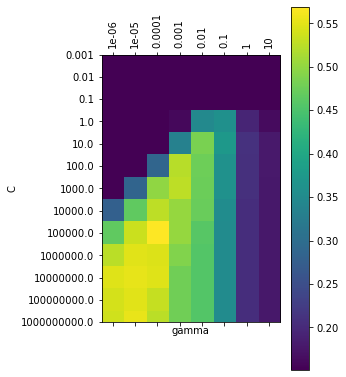


Best combination of parameters found:  {'C': 100000.0, 'gamma': 0.0001}

f1 10-fold cross on train data=  0.5679451438324523

Confusion matrix on test set:
 [[ 15   8   0   0   0]
 [ 15 174  11   0   0]
 [  0   9  51   2   0]
 [  0   0   4   7   1]
 [  0   0   0   4   1]]

f1 on test set:  0.6197305194021825

Number of supports:  324 ( 47 of them have slacks)
Prop. of supports:  0.4602272727272727


In [21]:
# Values we will test for each parameter. When observin results, consider the limits of the 
# values tested and increase them if necessary 
gammas = [0.000001,0.00001, 0.0001,0.001,0.01,0.1,1,10]
Cs = np.logspace(-3, 9, num=13, base=10.0)

param_grid = {'C': Cs, 'gamma' : gammas}
grid_search = GridSearchCV(SVC(), param_grid, cv=10,scoring='f1_macro')
grid_search.fit(X_train,y_train)
parval=grid_search.best_params_

# We'll show in a grid, the accuracy for each combination of parameters tester
scores = grid_search.cv_results_['mean_test_score']
scores = np.array(scores).reshape(len(param_grid['C']), len(param_grid['gamma']))

plt.matshow(scores)
plt.xlabel('gamma')
plt.ylabel('C')
plt.colorbar()
plt.xticks(np.arange(len(param_grid['gamma'])), param_grid['gamma'],rotation='vertical')
plt.yticks(np.arange(len(param_grid['C'])), param_grid['C'])
plt.show()
parval=grid_search.best_params_
print("\nBest combination of parameters found: ",parval)


cvacc = cross_val_score(SVC(C=parval['C'], gamma=parval['gamma']) , X=X_train,  y=y_train, cv=10, scoring='f1_macro')
print('\nf1 10-fold cross on train data= ', cvacc.mean())

knc = SVC(C=parval['C'], gamma=parval['gamma'])
knc.fit(X_train, y_train)
pred=knc.predict(X_test)
print("\nConfusion matrix on test set:\n",sklearn.metrics.confusion_matrix(y_test, pred))
print("\nf1 on test set: ",sklearn.metrics.f1_score(y_test, pred,average='macro'))
print("\nNumber of supports: ",np.sum(knc.n_support_), "(",np.sum(np.abs(knc.dual_coef_)==parval['C']) ,"of them have slacks)")
print("Prop. of supports: ",np.sum(knc.n_support_)/X_train.shape[0])

# Conclusions
We can see that for our dataset, polynomial kernels do not work very well, as the accuracy is lower than with the other SVM and they have lots of support, which the majority of them, have slacks.
The linear SVM has obtained the best f1 score of them all but it has a large number of supports and 38% of them have slacks, on the other hand, when we use a SVM with RBF kernel, the f1 score is a 6% lower, and the number of supports is somewhat higher but only a 14% have slacks.
It seems that the linear SVM is better but in order to decide, we will balance the dataset and see if the results change.

### Balancing the dataset

In [7]:
print(df['SalePrice'].unique())

X1 = df[df['SalePrice'] == 'Level1']
X2 = df[df['SalePrice'] == 'Level2']
X3 = df[df['SalePrice'] == 'Level3']
X4 = df[df['SalePrice'] == 'Level4']
X5 = df[df['SalePrice'] == 'Level5']

bdata = pd.DataFrame()

for i in range(3):
    bdata = bdata.append(X1, ignore_index = True)
bdata = bdata.append(X2.sample(frac=1/3), ignore_index = True)
bdata = bdata.append(X3, ignore_index = True)
for i in range(4):
    bdata = bdata.append(X4, ignore_index = True)
for i in range(10):
    bdata = bdata.append(X5, ignore_index = True)

bdata['SalePrice'].value_counts()

['Level2' 'Level4' 'Level1' 'Level3' 'Level5']


Level1    237
Level4    236
Level3    223
Level2    209
Level5    170
Name: SalePrice, dtype: int64

In [8]:
X = bdata.drop(columns='SalePrice')
X = X.drop(columns = 'Id')
Y = bdata.loc[:,'SalePrice']

le = Pre.LabelEncoder()
le.fit(Y)
Y = le.fit_transform(Y)
i = 0
for t in X.dtypes:
    if t == object or t == bool:
        le.fit(X.iloc[:,i])
        X.iloc[:,i] = le.fit_transform(X.iloc[:,i])
    i += 1

X_train, X_test, y_train, y_test = cv.train_test_split(X, Y, test_size=.3, random_state=1)

## Linear SVM with balanced dataset

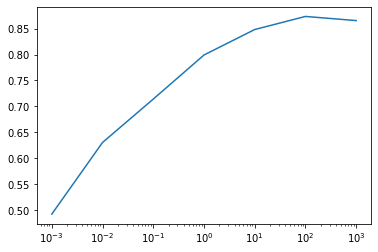

f1 10-fold cross on train data=  0.8747416382813131

Confusion matrix on test set:
 [[72  3  0  0  0]
 [13 38  7  0  0]
 [ 1 13 41  7  0]
 [ 0  0  6 76  0]
 [ 0  0  0  0 46]]

f1 on test set:  0.8402180078791772

Best value of parameter C found:  {'C': 100.0}

Number of supports:  338 ( 55 of them have slacks)
Prop. of supports:  0.449468085106383


In [24]:
# List of C values to test. We usualy test diverse orders of magnitude
#Cs = np.logspace(-3, 11, num=15, base=10.0)
Cs = np.logspace(-3, 3, num=7, base=10.0)

param_grid = {'C': Cs}
#grid_search = GridSearchCV(LinearSVC(), param_grid, cv=10)
grid_search = GridSearchCV(SVC(kernel='linear'), param_grid, cv=10)
grid_search.fit(X_train,y_train)

# Let's plot the 10-fold cross.validation accuracy deppending on C
scores = grid_search.cv_results_['mean_test_score']
plt.semilogx(Cs,scores)
plt.show()

parval=grid_search.best_params_
cvacc = cross_val_score(SVC(C=parval['C'],kernel='linear'), X=X_train,  y=y_train, cv=10, scoring='f1_macro')
print('f1 10-fold cross on train data= ', cvacc.mean())


# Let's apply the best C parameter found to the test set

#knc = LinearSVC(C=parval['C']) 
knc = SVC(C=parval['C'],kernel='linear')
knc.fit(X_train, y_train)
pred=knc.predict(X_test)
print("\nConfusion matrix on test set:\n",sklearn.metrics.confusion_matrix(y_test, pred))
print("\nf1 on test set: ",sklearn.metrics.f1_score(y_test, pred,average='macro'))
print("\nBest value of parameter C found: ",parval)
print("\nNumber of supports: ",np.sum(knc.n_support_), "(",np.sum(np.abs(knc.dual_coef_)==parval['C']) ,"of them have slacks)")
print("Prop. of supports: ",np.sum(knc.n_support_)/X_train.shape[0])

## RBF kernel with balanced dataset

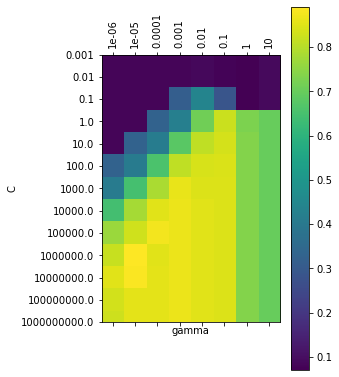


Best combination of parameters found:  {'C': 1000000.0, 'gamma': 1e-05}

f1 10-fold cross on train data=  0.8904653115501772

Confusion matrix on test set:
 [[75  0  0  0  0]
 [10 42  6  0  0]
 [ 1 13 42  6  0]
 [ 0  0  3 79  0]
 [ 0  0  0  0 46]]

f1 on test set:  0.8729020933562985

Number of supports:  350 ( 57 of them have slacks)
Prop. of supports:  0.4654255319148936


In [26]:
# Values we will test for each parameter. When observin results, consider the limits of the 
# values tested and increase them if necessary 
gammas = [0.000001,0.00001, 0.0001,0.001,0.01,0.1,1,10]
Cs = np.logspace(-3, 9, num=13, base=10.0)

param_grid = {'C': Cs, 'gamma' : gammas}
grid_search = GridSearchCV(SVC(), param_grid, cv=10,scoring='f1_macro')
grid_search.fit(X_train,y_train)
parval=grid_search.best_params_

# We'll show in a grid, the accuracy for each combination of parameters tester
scores = grid_search.cv_results_['mean_test_score']
scores = np.array(scores).reshape(len(param_grid['C']), len(param_grid['gamma']))

plt.matshow(scores)
plt.xlabel('gamma')
plt.ylabel('C')
plt.colorbar()
plt.xticks(np.arange(len(param_grid['gamma'])), param_grid['gamma'],rotation='vertical')
plt.yticks(np.arange(len(param_grid['C'])), param_grid['C'])
plt.show()
parval=grid_search.best_params_
print("\nBest combination of parameters found: ",parval)


cvacc = cross_val_score(SVC(C=parval['C'], gamma=parval['gamma']) , X=X_train,  y=y_train, cv=10, scoring='f1_macro')
print('\nf1 10-fold cross on train data= ', cvacc.mean())

knc = SVC(C=parval['C'], gamma=parval['gamma'])
knc.fit(X_train, y_train)
pred=knc.predict(X_test)
print("\nConfusion matrix on test set:\n",sklearn.metrics.confusion_matrix(y_test, pred))
print("\nf1 on test set: ",sklearn.metrics.f1_score(y_test, pred,average='macro'))
print("\nNumber of supports: ",np.sum(knc.n_support_), "(",np.sum(np.abs(knc.dual_coef_)==parval['C']) ,"of them have slacks)")
print("Prop. of supports: ",np.sum(knc.n_support_)/X_train.shape[0])

# Conclusions with balanced dataset
Here we can observe how balancing the dataset makes our f1 scores better. The linear SVM f1 score goes from a 68% to an 84% and the proportion of support point with slacks decreases to a 16%. For the RBF kernel, the f1 scores increases from 62% to 87% and the proportion of support point with slacks changes from a 14% to a 16%. The number of supports for each method increases but it makes sense as the number of points increased with the balancing. Again, both results are similar so we will try to see which is better agains the test dataset that we put apart.

## Load test data

In [9]:
dt = pd.read_csv('test.csv', sep=',', na_values="NA")
X = dt.drop(columns='SalePrice')
X = X.drop(columns = 'Id')
Y = dt.loc[:,'SalePrice']

le = Pre.LabelEncoder()
le.fit(Y)
Y = le.fit_transform(Y)
i = 0
for t in X.dtypes:
    if t == object or t == bool:
        le.fit(X.iloc[:,i])
        X.iloc[:,i] = le.fit_transform(X.iloc[:,i])
    i += 1
X_test = X
y_test = Y

## Linear SVM with test.csv

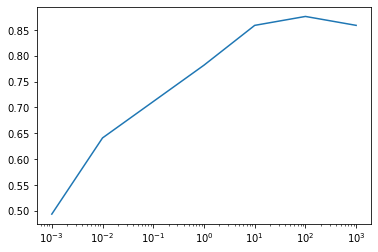

f1 10-fold cross on train data=  0.8792133835511937

Confusion matrix on test set:
 [[ 15  20   0   0   0]
 [ 12 246  17   1   0]
 [  1  10  58  19   0]
 [  0   0   9  13   3]
 [  0   0   1   0   7]]

f1 on test set:  0.6528137390154358

Best value of parameter C found:  {'C': 100.0}

Number of supports:  352 ( 65 of them have slacks)
Prop. of supports:  0.46808510638297873


In [10]:
# List of C values to test. We usualy test diverse orders of magnitude
#Cs = np.logspace(-3, 11, num=15, base=10.0)
Cs = np.logspace(-3, 3, num=7, base=10.0)

param_grid = {'C': Cs}
#grid_search = GridSearchCV(LinearSVC(), param_grid, cv=10)
grid_search = GridSearchCV(SVC(kernel='linear'), param_grid, cv=10)
grid_search.fit(X_train,y_train)

# Let's plot the 10-fold cross.validation accuracy deppending on C
scores = grid_search.cv_results_['mean_test_score']
plt.semilogx(Cs,scores)
plt.show()

parval=grid_search.best_params_
cvacc = cross_val_score(SVC(C=parval['C'],kernel='linear'), X=X_train,  y=y_train, cv=10, scoring='f1_macro')
print('f1 10-fold cross on train data= ', cvacc.mean())


# Let's apply the best C parameter found to the test set

#knc = LinearSVC(C=parval['C']) 
knc = SVC(C=parval['C'],kernel='linear')
knc.fit(X_train, y_train)
pred=knc.predict(X_test)
print("\nConfusion matrix on test set:\n",sklearn.metrics.confusion_matrix(y_test, pred))
print("\nf1 on test set: ",sklearn.metrics.f1_score(y_test, pred,average='macro'))
print("\nBest value of parameter C found: ",parval)
print("\nNumber of supports: ",np.sum(knc.n_support_), "(",np.sum(np.abs(knc.dual_coef_)==parval['C']) ,"of them have slacks)")
print("Prop. of supports: ",np.sum(knc.n_support_)/X_train.shape[0])

## RBF kernel with test.csv

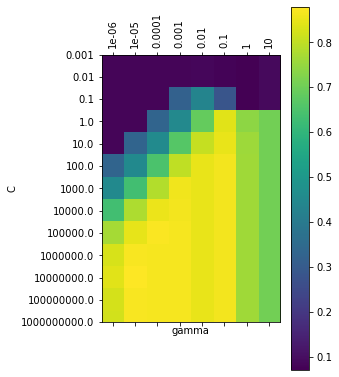


Best combination of parameters found:  {'C': 10000000.0, 'gamma': 1e-05}

f1 10-fold cross on train data=  0.8788444933778343

Confusion matrix on test set:
 [[ 13  21   1   0   0]
 [ 20 233  22   1   0]
 [  1  13  56  17   1]
 [  0   0  11  11   3]
 [  0   0   1   1   6]]

f1 on test set:  0.5854743593356566

Number of supports:  324 ( 6 of them have slacks)
Prop. of supports:  0.4308510638297872


In [11]:
# Values we will test for each parameter. When observin results, consider the limits of the 
# values tested and increase them if necessary 
gammas = [0.000001,0.00001, 0.0001,0.001,0.01,0.1,1,10]
Cs = np.logspace(-3, 9, num=13, base=10.0)

param_grid = {'C': Cs, 'gamma' : gammas}
grid_search = GridSearchCV(SVC(), param_grid, cv=10,scoring='f1_macro')
grid_search.fit(X_train,y_train)
parval=grid_search.best_params_

# We'll show in a grid, the accuracy for each combination of parameters tester
scores = grid_search.cv_results_['mean_test_score']
scores = np.array(scores).reshape(len(param_grid['C']), len(param_grid['gamma']))

plt.matshow(scores)
plt.xlabel('gamma')
plt.ylabel('C')
plt.colorbar()
plt.xticks(np.arange(len(param_grid['gamma'])), param_grid['gamma'],rotation='vertical')
plt.yticks(np.arange(len(param_grid['C'])), param_grid['C'])
plt.show()
parval=grid_search.best_params_
print("\nBest combination of parameters found: ",parval)


cvacc = cross_val_score(SVC(C=parval['C'], gamma=parval['gamma']) , X=X_train,  y=y_train, cv=10, scoring='f1_macro')
print('\nf1 10-fold cross on train data= ', cvacc.mean())

knc = SVC(C=parval['C'], gamma=parval['gamma'])
knc.fit(X_train, y_train)
pred=knc.predict(X_test)
print("\nConfusion matrix on test set:\n",sklearn.metrics.confusion_matrix(y_test, pred))
print("\nf1 on test set: ",sklearn.metrics.f1_score(y_test, pred,average='macro'))
print("\nNumber of supports: ",np.sum(knc.n_support_), "(",np.sum(np.abs(knc.dual_coef_)==parval['C']) ,"of them have slacks)")
print("Prop. of supports: ",np.sum(knc.n_support_)/X_train.shape[0])

# Final conclusion
When using real test data that has not been balanced, we observe similar results as with the first execution. Now we have a much better f1 score on the training data, but on the test data, we have a 64.7% with linear SVM and a 58.5% with RBF. The number of supports in each method is similar, and the RBF has significantly less points with slacks but in the end we will opt for the linear SVM as the best SVM for our data.

In [13]:
from statsmodels.stats.proportion import proportion_confint
accuracy = sklearn.metrics.accuracy_score(y_test, pred)
precision = sklearn.metrics.precision_score(y_test, pred, average='macro')
recall = sklearn.metrics.precision_score(y_test, pred, average='macro')
f1 = sklearn.metrics.f1_score(y_test, pred, average='macro')
epsilon = sklearn.metrics.f1_score(y_test, pred, average='macro')
print("Accuracy: ",accuracy)
print("Precision: ",precision)
print("Recall: ",recall)
print("f1: ",f1)
print("Confidence interval: ",proportion_confint(count=epsilon*X_test.shape[0], nobs=X_test.shape[0], alpha=0.05, method='binom_test'))

Accuracy:  0.7847222222222222
Precision:  0.6406621937312474
Recall:  0.6406621937312474
f1:  0.6528137390154358
Confidence interval:  (0.6065536761540314, 0.6969043851463665)
